### Chapter4_Queation 14

In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

In [2]:
from ISLP import load_data
Auto=load_data("Auto")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median()
method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:

In [15]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
import ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)
import seaborn as sns
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

Auto['mpg01']=np.where(Auto["mpg"]>Auto["mpg"].median(),1,0)

(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

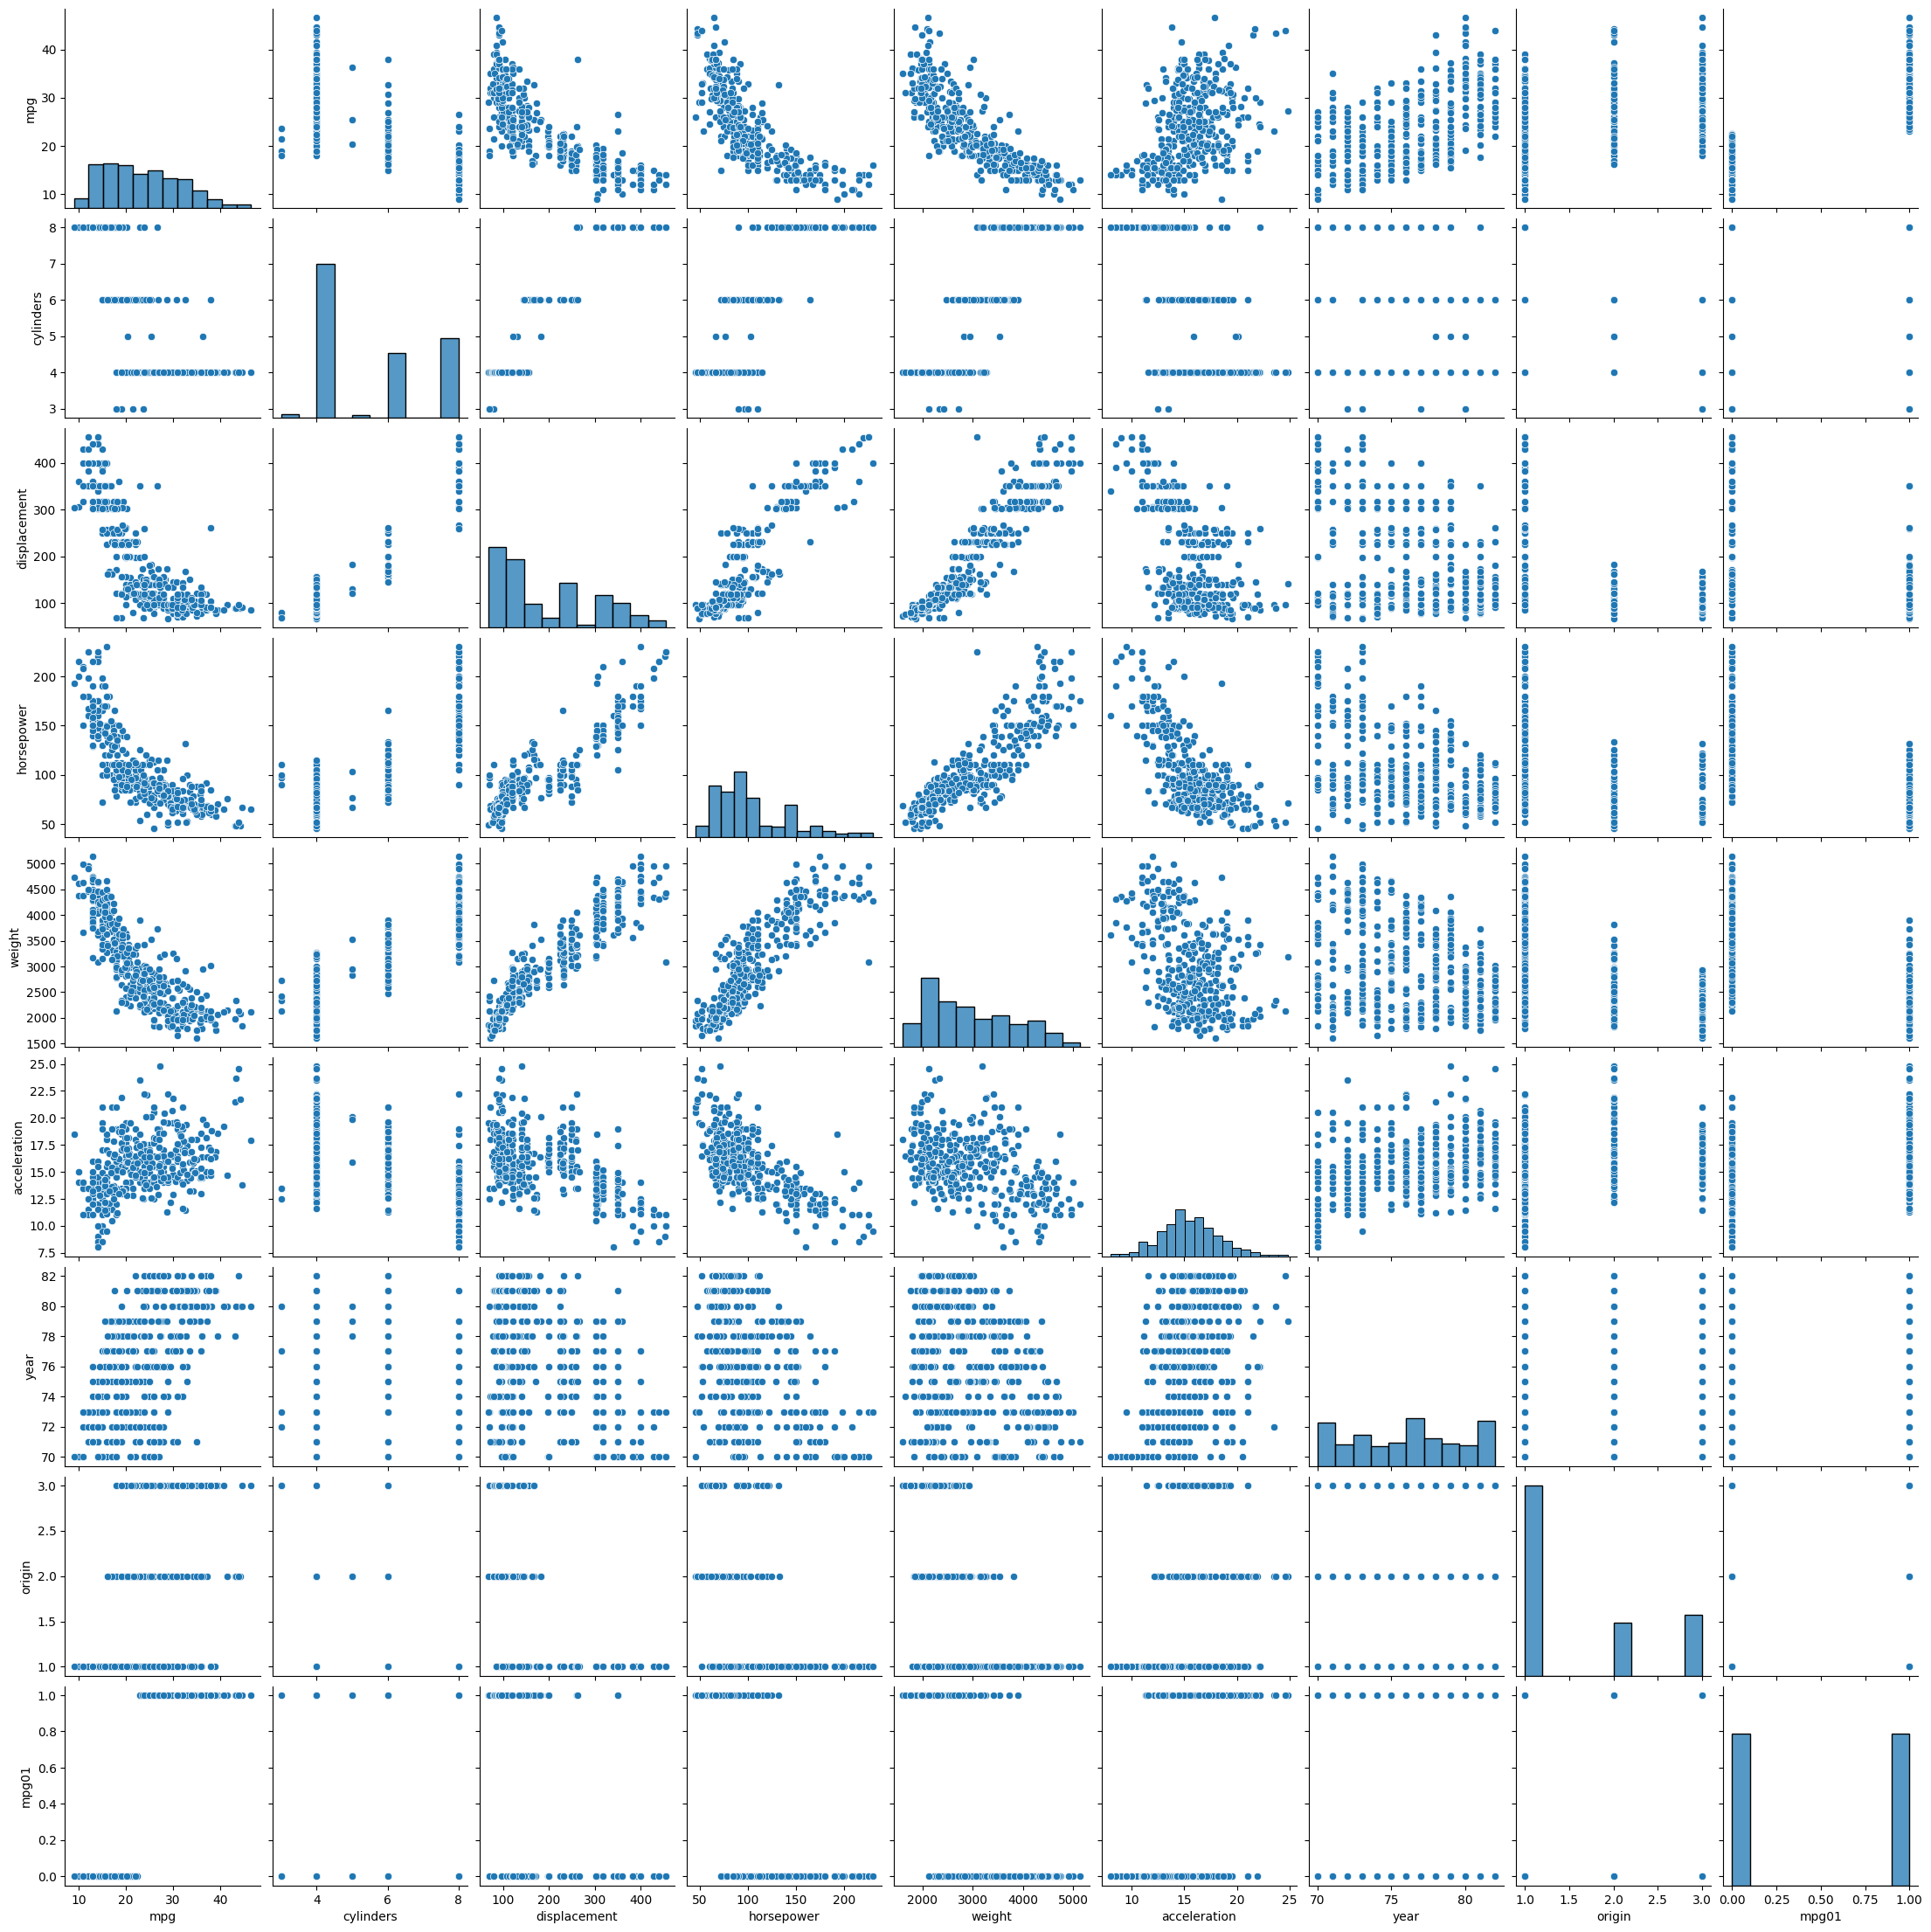

In [5]:
sns.pairplot(Auto);

From the scatter plot, we could inference that there might be a correlation among mpg01, displacement and cylinders.

In [7]:
x=Auto[['displacement','cylinders']].values
#the values attribute is used to convert x from a dataframe object to an array
y=Auto['mpg01'].values

(c) Split the data into a training set and a test set.

In [8]:
(X_train,X_test,y_train,y_test) = train_test_split(x,y,random_state=314657018)

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [16]:
lda=LDA(store_covariance=True)
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

cm_lda = confusion_matrix(y_test, lda_pred)
acc_lda = accuracy_score(y_test, lda_pred)
print("(e) LDA")
print("Confusion Matrix:\n", cm_lda)
print("Accuracy:", round(acc_lda, 3))
print("-" * 40)

(e) LDA
Confusion Matrix:
 [[40  7]
 [ 4 47]]
Accuracy: 0.888
----------------------------------------


In [17]:
lda_pred=lda.predict(X_test)
ISLP.confusion_table(lda_pred,y_test)

Truth,0,1
Predicted,,
0,40,4
1,7,47


In [18]:
LDA_test_err=1-accuracy_score(y_test, lda.predict(X_test))
LDA_test_err

0.11224489795918369

The test error is 11%.

(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [19]:
qda = QDA()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)

cm_qda = confusion_matrix(y_test, qda_pred)
acc_qda = accuracy_score(y_test, qda_pred)
print("(f) QDA")
print("Confusion Matrix:\n", cm_qda)
print("Accuracy:", round(acc_qda, 3))
print("-" * 40)

(f) QDA
Confusion Matrix:
 [[41  6]
 [ 5 46]]
Accuracy: 0.888
----------------------------------------


In [20]:
QDA_test_err=1-accuracy_score(y_test, qda.predict(X_test))
QDA_test_err

0.11224489795918369

(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [21]:
lr=LogisticRegression()
result=lr.fit(X_train,y_train)
lr_test_error=1-accuracy_score(y_test, lr.predict(X_test))
lr_test_error

0.11224489795918369

(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [24]:
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)

cm_NB = confusion_matrix(y_test, NB_pred)
acc_NB = accuracy_score(y_test, NB_pred)
print("(g) NB")
print("Confusion Matrix:\n", cm_NB)
print("Accuracy:", round(acc_NB, 3))
print("-" * 40)

(g) NB
Confusion Matrix:
 [[41  6]
 [ 5 46]]
Accuracy: 0.888
----------------------------------------


In [25]:
NB_test_error=1-accuracy_score(y_test, NB_pred)
NB_test_error

0.11224489795918369

(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [26]:
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print('K={:3}, accuracy = {:.4f}'.format(k, acc))

K=  1, accuracy = 0.8776
K=  2, accuracy = 0.8776
K=  3, accuracy = 0.8878
K=  4, accuracy = 0.8878
K=  5, accuracy = 0.8878
K=  6, accuracy = 0.8776
K=  7, accuracy = 0.8878
K=  8, accuracy = 0.8878
K=  9, accuracy = 0.8878
K= 10, accuracy = 0.8878
K= 11, accuracy = 0.8878
K= 12, accuracy = 0.8776
K= 13, accuracy = 0.8878
K= 14, accuracy = 0.8776
K= 15, accuracy = 0.8878
K= 16, accuracy = 0.8878
K= 17, accuracy = 0.8878
K= 18, accuracy = 0.8878
K= 19, accuracy = 0.8878
K= 20, accuracy = 0.8878
K= 21, accuracy = 0.8878
K= 22, accuracy = 0.8878
K= 23, accuracy = 0.8878
K= 24, accuracy = 0.8878
K= 25, accuracy = 0.8878
K= 26, accuracy = 0.8878
K= 27, accuracy = 0.8878
K= 28, accuracy = 0.8878
K= 29, accuracy = 0.8878
K= 30, accuracy = 0.8878
K= 31, accuracy = 0.8980
K= 32, accuracy = 0.8980
K= 33, accuracy = 0.8980
K= 34, accuracy = 0.8980
K= 35, accuracy = 0.8980
K= 36, accuracy = 0.8980
K= 37, accuracy = 0.8980
K= 38, accuracy = 0.8980
K= 39, accuracy = 0.8980
K= 40, accuracy = 0.8980
